### Importing required libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings

In [68]:
warnings.filterwarnings("ignore")

### loading the data

In [3]:
data=pd.read_csv("./Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Feature Engineering

#### Dropping id feature

In [35]:
data.drop('Id',axis=1,inplace=True)

#### Transforming categorical variable to dummy variables

In [36]:
data.iloc[:,-1].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
mapper={'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}}

In [38]:
feature_engineerred_data=data.replace(mapper)

In [39]:
feature_engineerred_data['Species'].unique()

array([0, 1, 2], dtype=int64)

In [40]:
feature_engineerred_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Outlier Detection

<AxesSubplot:xlabel='PetalWidthCm'>

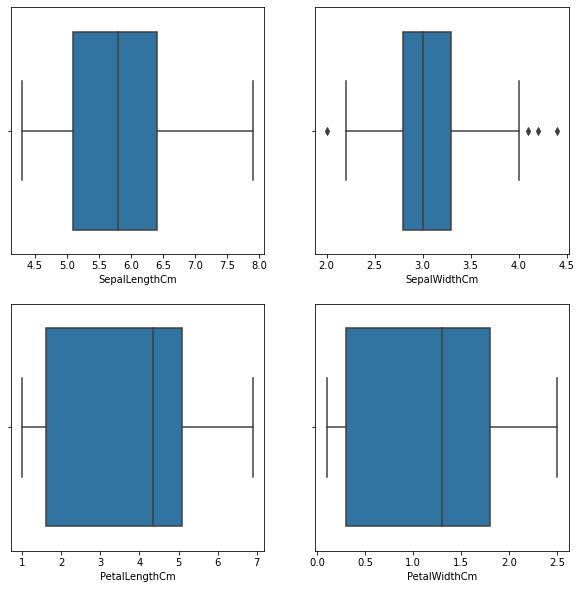

In [69]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(data.iloc[:,0],ax=axes[0,0])
sns.boxplot(data.iloc[:,1],ax=axes[0,1])
sns.boxplot(data.iloc[:,2],ax=axes[1,0])
sns.boxplot(data.iloc[:,3],ax=axes[1,1])

##### From the above box plot it is evident that SepalwidthCm has outliers let us sort them out from the dataset mathematically

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

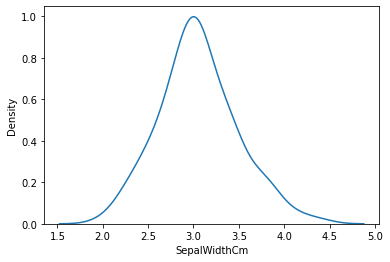

In [88]:
# Sepal width has a normal distribution so we can perform outlier removal process using the condition Q1-1.5*IQR and Q3+1.5*IQR
sns.kdeplot(data['SepalWidthCm'])

In [81]:
IQR=3.300000-2.800000

In [82]:
lower_limit=2.800000-1.5*IQR
upper_limit=3.300000+1.5*IQR

In [83]:
outlier_free_data=feature_engineerred_data[(feature_engineerred_data['SepalWidthCm']>lower_limit)&(feature_engineerred_data['SepalWidthCm']<upper_limit)]

In [84]:
outlier_free_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:xlabel='SepalWidthCm'>

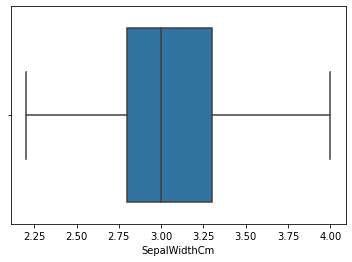

In [85]:
sns.boxplot(outlier_free_data['SepalWidthCm'])

### Feature Selection

<AxesSubplot:>

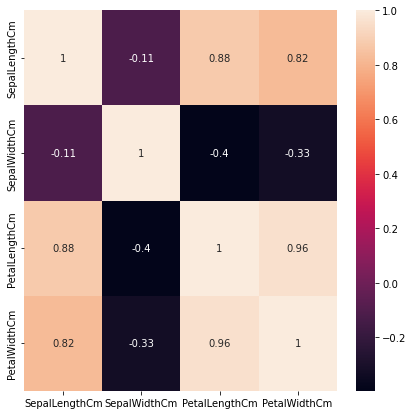

In [95]:
plt.figure(figsize=(7,7))
sns.heatmap(outlier_free_data.iloc[:,:-1].corr(),annot=True)

##### It is evident from the above heatmap based correlation shows high correlation between PetalLengthCm and PetalWidthCm also PetalLengthCm and SepalLengthCm also PetalWidthCm and SepalLengthCm

##### Dropping the other highly correlated features and selecting only PetalLengthCm and SepalLengthCm

In [97]:
outlier_free_data.drop(['PetalWidthCm','SepalWidthCm'],axis=1,inplace=True)

## Model Development

#### Finding the optimum number of clusters for k-means classification

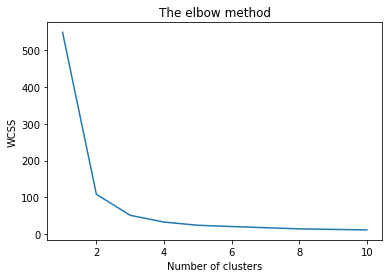

In [134]:
x = outlier_free_data.iloc[:,:-1].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

#### choosing to use cluster value as 3 for KMean model

In [146]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

### Visualizing the clusters

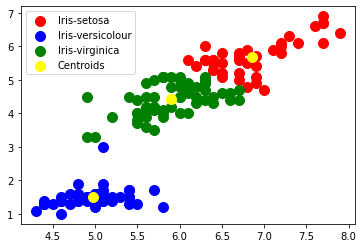

In [147]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()